In [1]:
import pandas as pd 
%matplotlib inline
import string
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

from sklearn.feature_extraction.text import CountVectorizer

# (1) MultiClass Perceptron

### (a) load in the data set data0.txt

In [23]:
data = np.loadtxt('data0.txt')
n, d = data.shape
# Create training set x and labels y
x_data = data[:, 0:d-1]
y_data = data[:, d-1]

### (b) run the multiclass perceptron

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def evaluate_classifier(W, b, x):
    scores = np.dot(x, W) + b
    predicted_class = np.argmax(scores)
    return predicted_class

In [25]:
def train_perceptron(x, y, k, n_iters=100):
    n, d = x.shape
    W = np.zeros((d, k))
    b = np.zeros((k,))
    done = False
    converged = True
    iters = 0
    np.random.seed(None)
    while not(done):
        done = True
        I = np.random.permutation(n)
        for i in range(n):
            j = I[i]
            predicted_class = evaluate_classifier(W, b, x[j])
            if predicted_class != y[j]:
                W[:, predicted_class] -= x[j]
                b[predicted_class] -= 1
                W[:, y[j]] += x[j]
                b[y[j]] += 1
                done = False
        iters += 1
        if iters > n_iters:
            done = True
            converged = False
    if converged:
        print("Perceptron algorithm: iterations until convergence:", iters)
    else:
        print("Perceptron algorithm: did not converge within the specified number of iterations")
    return W, b, converged

In [26]:
def run_perceptron(datafile):
    data = np.loadtxt(datafile)
    n, d = data.shape
    # Create training set x and labels y
    x = data[:, 0:d-1]
    y = data[:, d-1].astype(int)
    k = len(np.unique(y))
    # Run the Perceptron algorithm for at most 100 iterations
    W, b, converged = train_perceptron(x, y, k, n_iters=100)
    # Determine the x1- and x2- limits of the plot
    x1min, x1max = np.min(x[:, 0]), np.max(x[:, 0])
    x2min, x2max = np.min(x[:, 1]), np.max(x[:, 1])
    x1_range, x2_range = np.meshgrid(np.linspace(x1min-1, x1max+1, num=1000), np.linspace(x2min-1, x2max+1, num=1000))
    grid = np.c_[x1_range.ravel(), x2_range.ravel()]
    Z = np.array([evaluate_classifier(W, b, pt) for pt in grid])
    Z = Z.reshape(x1_range.shape)
    # Plot the data points
    markers = ['o', 's', '^', 'D']
    colors = ["red", "green", "orange", "purple"]
    
    for i in range(k):
        plt.scatter(x[y==i, 0], x[y==i, 1], cmap=plt.cm.Set1, edgecolor='k', c=colors[i], marker=markers[i], s=40)
    
   
    # Plot the decision boundary
    plt.contourf(x1_range, x2_range, Z, alpha=0.4, cmap=plt.cm.Set1)
    plt.xlim(x1min-0.5, x1max+0.5)
    plt.ylim(x2min-0.5, x2max+0.5)
    plt.show()

In [ ]:
def evaluate_classifier(W, b, x):
    scores = np.dot(x, W) + b
    predicted_class = np.argmax(scores)
    return predicted_class
def train_perceptron(x, y, k, n_iters=100):
    n, d = x.shape
    W = np.zeros((d, k))
    b = np.zeros((k,))
    done = False
    converged = True
    iters = 0
    np.random.seed(None)
    while not(done):
        done = True
        I = np.random.permutation(n)
        for i in range(n):
            j = I[i]
            predicted_class = evaluate_classifier(W, b, x[j])
            if predicted_class != y[j]:
                W[:, predicted_class] -= x[j]
                b[predicted_class] -= 1
                W[:, y[j]] += x[j]
                b[y[j]] += 1
                done = False
        iters += 1
        if iters > n_iters:
            done = True
            converged = False
    if converged:
        print("Perceptron algorithm: iterations until convergence:", iters)
    else:
        print("Perceptron algorithm: did not converge within the specified number of iterations")
    return W, b, converged
def run_perceptron(datafile):
    data = np.loadtxt(datafile)
    n, d = data.shape
    # Create training set x and labels y
    x = data[:, 0:d-1]
    y = data[:, d-1].astype(int)
    k = len(np.unique(y))
    # Run the Perceptron algorithm for at most 100 iterations
    W, b, converged = train_perceptron(x, y, k, n_iters=100)
    # Determine the x1- and x2- limits of the plot
    x1min, x1max = np.min(x[:, 0]), np.max(x[:, 0])
    x2min, x2max = np.min(x[:, 1]), np.max(x[:, 1])
    x1_range, x2_range = np.meshgrid(np.linspace(x1min-1, x1max+1, num=1000), np.linspace(x2min-1, x2max+1, num=1000))
    grid = np.c_[x1_range.ravel(), x2_range.ravel()]
    Z = np.array([evaluate_classifier(W, b, pt) for pt in grid])
    Z = Z.reshape(x1_range.shape)
    # Plot the data points
    markers = ['o', 's', '^', 'D']
    colors = ["red", "green", "orange", "purple"]
    
    for i in range(k):
        plt.scatter(x[y==i, 0], x[y==i, 1], cmap=plt.cm.Set1, edgecolor='k', c=colors[i], marker=markers[i], s=40)
    
   
    # Plot the decision boundary
    plt.contourf(x1_range, x2_range, Z, alpha=0.4, cmap=plt.cm.Set1)
    plt.xlim(x1min-0.5, x1max+0.5)
    plt.ylim(x2min-0.5, x2max+0.5)
    plt.show()

Perceptron algorithm: iterations until convergence: 28


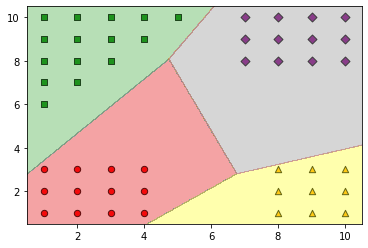

In [27]:
run_perceptron('data0.txt')

# (2) Multiclass SVM

### (a) Load in the MNIST data

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt 
import gzip, os
import numpy as np
from scipy.stats import multivariate_normal
import sys
import pandas as pd

if sys.version_info[0] == 2:
    from urllib import urlretrieve
else:
    from urllib.request import urlretrieve
    
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [7]:
# Function that downloads a specified MNIST data file from Yann Le Cun's website
def download(filename, source='http://yann.lecun.com/exdb/mnist/'):
    print("Downloading %s" % filename)
    urlretrieve(source + filename, filename)

# Invokes download() if necessary, then reads in images
def load_mnist_images(filename):
    if not os.path.exists(filename):
        download(filename)
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1,784)
    return data

def load_mnist_labels(filename):
    if not os.path.exists(filename):
        download(filename)
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data
## Load the training set
train_data = load_mnist_images('train-images-idx3-ubyte.gz')
train_labels = load_mnist_labels('train-labels-idx1-ubyte.gz')

## Load the testing set
test_data = load_mnist_images('t10k-images-idx3-ubyte.gz')
test_labels = load_mnist_labels('t10k-labels-idx1-ubyte.gz')

### (b) SVM classifier

In [8]:
def fit_classifier(C_value=1.0):
    clf = LinearSVC(loss='hinge', C=C_value, max_iter=10)
    clf.fit(train_data, train_labels)
    
    train_pred = clf.predict(train_data)
    train_error = float(np.sum((train_pred > 0.0) != (train_labels > 0.0)))/len(train_labels)
    
    test_pred = clf.predict(test_data)
    test_error = float(np.sum((test_pred > 0.0) != (test_labels > 0.0)))/len(test_labels)
    
    return train_error, test_error

#### Strategy for choosing optimal C value
    - Test large range of potential c values, return training and test error values
    - Test smaller range of potential c values around optimal c value from previous step, use 5-fold cross validation to 
      determine lowest cv error and test error
    - use argmin(error) to return the c value with the lowest cv and test error rates.

In [9]:
C_values = [1e-10, 1e-8, 1e-6, 1e-4, 1e-2, 1, 1e2, 1e4]
train_errors = []
test_errors = []

for c in C_values:
    train_error, test_error = fit_classifier(c)
    train_errors.append(train_error)
    test_errors.append(test_error)

C:\Users\Linds\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Linds\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Linds\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Linds\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Linds\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Linds\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

In [10]:
d = {'C':C_values,'Training Error':train_errors, 'Test Error':test_errors}
df = pd.DataFrame(data=d).set_index('C')
df

,Training Error,Test Error
C,,
1.000000e-10,0.061333,0.0607
1.000000e-08,0.011367,0.0105
1.000000e-06,0.007133,0.0066
1.000000e-04,0.023000,0.0231
1.000000e-02,0.008950,0.0081
1.000000e+00,0.009883,0.0103
1.000000e+02,0.012233,0.0124
1.000000e+04,0.008367,0.0099


In [11]:
def cross_validation_error(x,y,C_value,k):
    n = len(y)
    ## Randomly shuffle indices
    indices = np.random.permutation(n)
    
    ## Initialize error
    err = 0.0
    
    ## Iterate over partitions
    for i in range(k):
        ## Partition indices
        test_indices = indices[int(i*(n/k)):int((i+1)*(n/k) - 1)]
        train_indices = np.setdiff1d(indices, test_indices)
        
        ## Train classifier with parameter c
        clf = LinearSVC(C=C_value, loss='hinge')
        clf.fit(x[train_indices], y[train_indices])
        
        ## Get predictions on test partition
        preds = clf.predict(x[test_indices])
        
        ## Compute error
        err += float(np.sum((preds > 0.0) != (y[test_indices] > 0.0)))/len(test_indices)
        
    return err/k

In [18]:
def choose_parameter(x,y,k):
    ## Iterate over potential values of C
    c_vals = [.0000001, .0000005, .000001, .000005, .00001, .00005, .0001]
    errs = np.array([cross_validation_error(x, y, c, k) for c in c_vals])
    # Plot the cross-validation errors
    plt.plot(c_vals, errs, 'ro')
    plt.xscale('log')
    plt.xlabel('C', fontsize=14)
    plt.ylabel('Cross-validation error', fontsize=14)
    plt.show()
    ## Return best value of C and associated error estimate
    return c_vals[np.argmin(errs)], errs[np.argmin(errs)]

C:\Users\Linds\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Linds\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Linds\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Linds\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Linds\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Linds\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

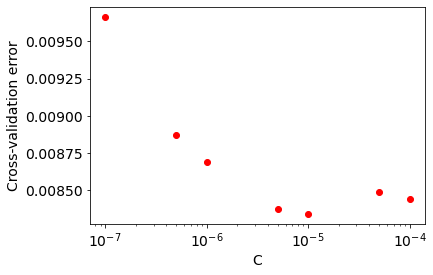

Choice of C:  1e-05
Cross-validation error estimate:  0.008334027835652971
Test error:  0.0077


C:\Users\Linds\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [37]:
c, err = choose_parameter(train_data, train_labels, 5)
print("Choice of C: ", c)
print("Cross-validation error estimate: ", err)
## Train it and test it
clf = LinearSVC(C=c, loss='hinge')
clf.fit(train_data, train_labels)

preds = clf.predict(test_data)
error = float(np.sum((preds > 0.0) != (test_labels > 0.0)))/len(test_labels)

print("Test error: ", error)

### (c) Test error and linear separability

In [38]:
# train model at optimal c over 60,000 possible iterations to determine if it converges (training error = 0)
clf = LinearSVC(loss='hinge', C=5e-5, max_iter=60000)
clf.fit(train_data, train_labels)

y_pred = clf.predict(test_data)
accuracy = accuracy_score(test_labels, y_pred)

test_error = float(np.sum((y_pred > 0.0) != (test_labels > 0.0)))/len(test_labels)

train_pred = clf.predict(train_data)
train_error = float(np.sum((train_pred > 0.0) != (train_labels > 0.0)))/len(train_labels)

print("Test Error: ", test_error)
print("Training Error: ", train_error)
print("Optimal C: ", c)

Test Error:  0.0072
Training Error:  0.006266666666666667
Optimal C:  1e-05


C:\Users\Linds\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### For a dataset to be linearly separable, the value of C (ie slack) should be very large and the training error should be zero. In the case of the MNIST data set, the value of C is very close to zero (0.00001) and while the training error is close to zero, it is ultimately  > 0. (Additionally, the model does not appear to converge after 60,000 iterations).

#### Therefore, the data is not linearly separable.

Text(29.0, 0.5, 'Actual')

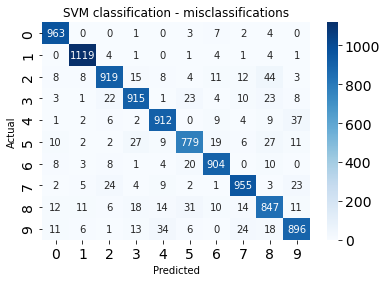

<Figure size 576x360 with 0 Axes>

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

confmat_est = confusion_matrix(test_labels, preds)
ax= plt.subplot()
plt.figure(figsize = (8,5))
sns.heatmap(confmat_est, annot=True, fmt='', cmap='Blues', ax=ax)
ax.set_title('SVM classification - misclassifications')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

# (3) Kernel Perceptron

In [48]:
from sklearn.metrics.pairwise import polynomial_kernel
from sklearn.linear_model import Perceptron

In [84]:
data = np.loadtxt('data1.txt').astype(int)
n, d = data.shape
# Create training set x and labels y
x_data1 = data[:, 0:d-1]
y_data1 = data[:, d-1]

In [83]:
data2 = np.loadtxt('data2.txt').astype(int)
n, d = data2.shape
# Create training set x and labels y
x_data2 = data2[:, 0:d-1]
y_data2 = data2[:, d-1]

# (4) Multiclass kernel SVM

### (a) Load in the MNIST data

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt 
import gzip, os
import numpy as np
from scipy.stats import multivariate_normal
import sys
import pandas as pd

if sys.version_info[0] == 2:
    from urllib import urlretrieve
else:
    from urllib.request import urlretrieve
    
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Function that downloads a specified MNIST data file from Yann Le Cun's website
def download(filename, source='http://yann.lecun.com/exdb/mnist/'):
    print("Downloading %s" % filename)
    urlretrieve(source + filename, filename)

# Invokes download() if necessary, then reads in images
def load_mnist_images(filename):
    if not os.path.exists(filename):
        download(filename)
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1,784)
    return data

def load_mnist_labels(filename):
    if not os.path.exists(filename):
        download(filename)
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data
## Load the training set
train_data = load_mnist_images('train-images-idx3-ubyte.gz')
train_labels = load_mnist_labels('train-labels-idx1-ubyte.gz')

## Load the testing set
test_data = load_mnist_images('t10k-images-idx3-ubyte.gz')
test_labels = load_mnist_labels('t10k-labels-idx1-ubyte.gz')

### (b) SVM classifier

In [3]:
def fit_classifier(C_value=1.0):
    clf = LinearSVC(loss='hinge', C=C_value, max_iter=100)
    clf.fit(train_data, train_labels)
    
    train_pred = clf.predict(train_data)
    train_error = float(np.sum((train_pred > 0.0) != (train_labels > 0.0)))/len(train_labels)
    
    test_pred = clf.predict(test_data)
    test_error = float(np.sum((test_pred > 0.0) != (test_labels > 0.0)))/len(test_labels)
    
    return train_error, test_error

In [4]:
C_values = [0.01, 0.1, 1.0, 10.0, 100.0]
train_errors = []
test_errors = []

for c in C_values:
    train_error, test_error = fit_classifier(c)
    train_errors.append(train_error)
    test_errors.append(test_error)

C:\Users\Linds\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Linds\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Linds\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Linds\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Linds\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [5]:
d = {'C':C_values,'Training Error':train_errors, 'Test Error':test_errors}
df = pd.DataFrame(data=d).set_index('C')
df

,Training Error,Test Error
C,,
0.01,0.010450,0.0128
0.10,0.011083,0.0106
1.00,0.011183,0.0129
10.00,0.008233,0.0092
100.00,0.011700,0.0132


#### No, the data does not appear to be linearly separable. Training error does not equal zero.

### (c) quadratic kernel SVM

In [19]:
def quadratic_fit_classifier(C_value=1.0):
    clf = SVC(kernel='poly', degree=2, C=C_value, max_iter=1000)
    clf.fit(train_data, train_labels)
    
    train_pred = clf.predict(train_data)
    train_error = float(np.sum((train_pred > 0.0) != (train_labels > 0.0)))/len(train_labels)
    
    test_pred = clf.predict(test_data)
    test_error = float(np.sum((test_pred > 0.0) != (test_labels > 0.0)))/len(test_labels)
    
    n_supp_vect = sum(clf.n_support_)
    
    return train_error, test_error, n_supp_vect

In [21]:
quad_train_error, quad_test_error, n_supp_vect = quadratic_fit_classifier()

C:\Users\Linds\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [22]:
d = {'Training Error':quad_train_error, 'Test Error':quad_test_error, 'Number of Support Vectors':n_supp_vect}
d

{'Training Error': 0.0012,
 'Test Error': 0.0029,
 'Number of Support Vectors': 10015}